In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree

In [88]:
 
data = pd.read_csv('customer_churn.csv')
#dataset structure
data.head()


,CustomerID,Age,Subscription_Length_Months,Watch_Time_Hours,Number_of_Logins,Payment_Issues,Number_of_Complaints,Resolution_Time_Days,Membership_Type,Payment_Method,Preferred_Content_Type,Churn
0,1,56,35,157.957600,59,0,1,4,Standard,Debit,Movies,0
1,2,69,15,93.515499,26,0,3,1,Basic,Debit,TV Shows,0
2,3,46,25,87.095143,57,1,6,15,Premium,PayPal,Movies,1
3,4,32,28,113.986323,12,0,4,13,Standard,Credit Card,Sports,0
4,5,60,10,101.534816,11,1,5,8,Basic,Credit Card,Movies,1


In [89]:
#summary statistics for numerical  and categorical features

data.describe(include='all')

,CustomerID,Age,Subscription_Length_Months,Watch_Time_Hours,Number_of_Logins,Payment_Issues,Number_of_Complaints,Resolution_Time_Days,Membership_Type,Payment_Method,Preferred_Content_Type,Churn
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Debit,Movies,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,353,347,371,NaN
mean,500.500000,43.81900,18.218000,120.750899,30.984000,0.245000,4.552000,14.978000,NaN,NaN,NaN,0.793000
std,288.819436,14.99103,10.177822,38.583580,17.562237,0.430302,2.912349,8.394521,NaN,NaN,NaN,0.405358
min,1.000000,18.00000,1.000000,10.000000,1.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000
25%,250.750000,31.00000,9.000000,93.630672,16.750000,0.000000,2.000000,7.000000,NaN,NaN,NaN,1.000000
50%,500.500000,44.00000,18.000000,122.085008,31.000000,0.000000,5.000000,15.000000,NaN,NaN,NaN,1.000000
75%,750.250000,56.00000,27.000000,147.273070,47.000000,0.000000,7.000000,22.000000,NaN,NaN,NaN,1.000000


In [90]:
#checking for missing values
data.isnull().sum()

CustomerID                    0
Age                           0
Subscription_Length_Months    0
Watch_Time_Hours              0
Number_of_Logins              0
Payment_Issues                0
Number_of_Complaints          0
Resolution_Time_Days          0
Membership_Type               0
Payment_Method                0
Preferred_Content_Type        0
Churn                         0
dtype: int64

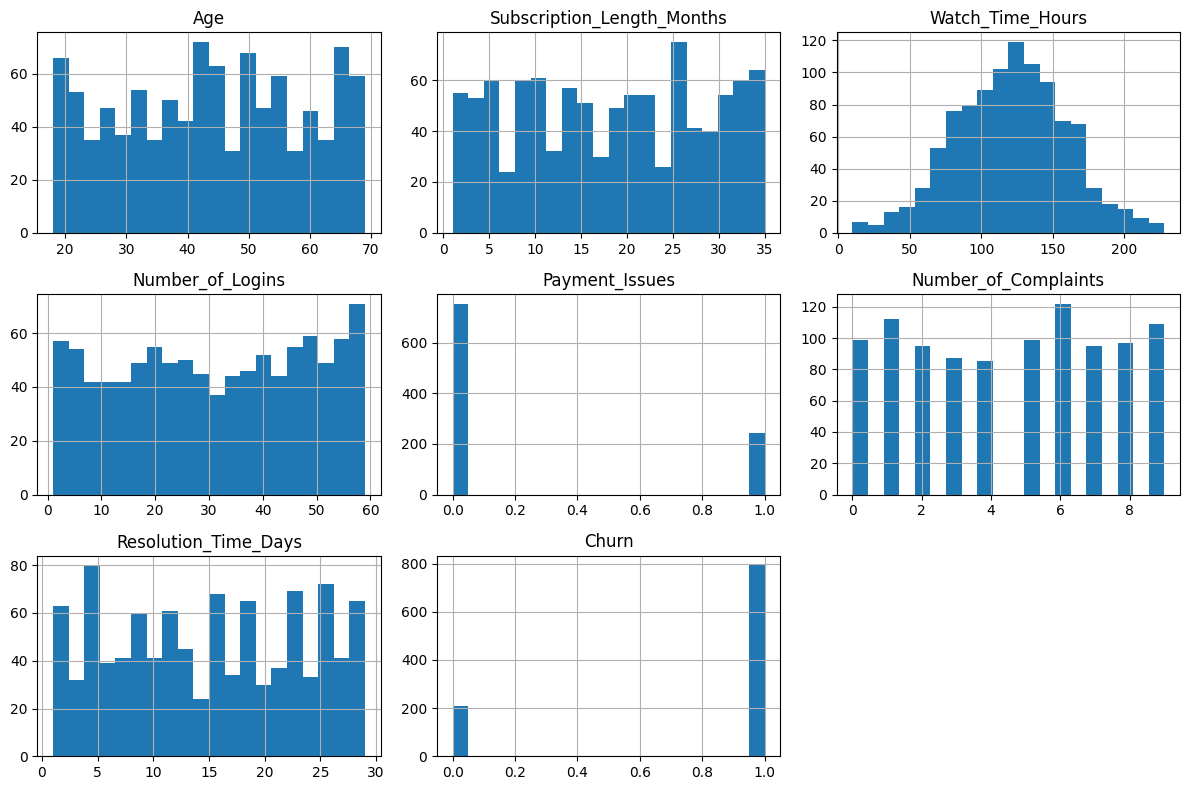

In [91]:
# exploratory data analysis
# drop the CustomerID column as it is not useful for analysis
data.drop(columns=['CustomerID'], inplace=True)
data.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()
#  the churn distribution is imbalanced, with a majority of customers churning(1).
# Most other numerical features appear uniformly distributed except watch_time_hours which is right-skewed. 

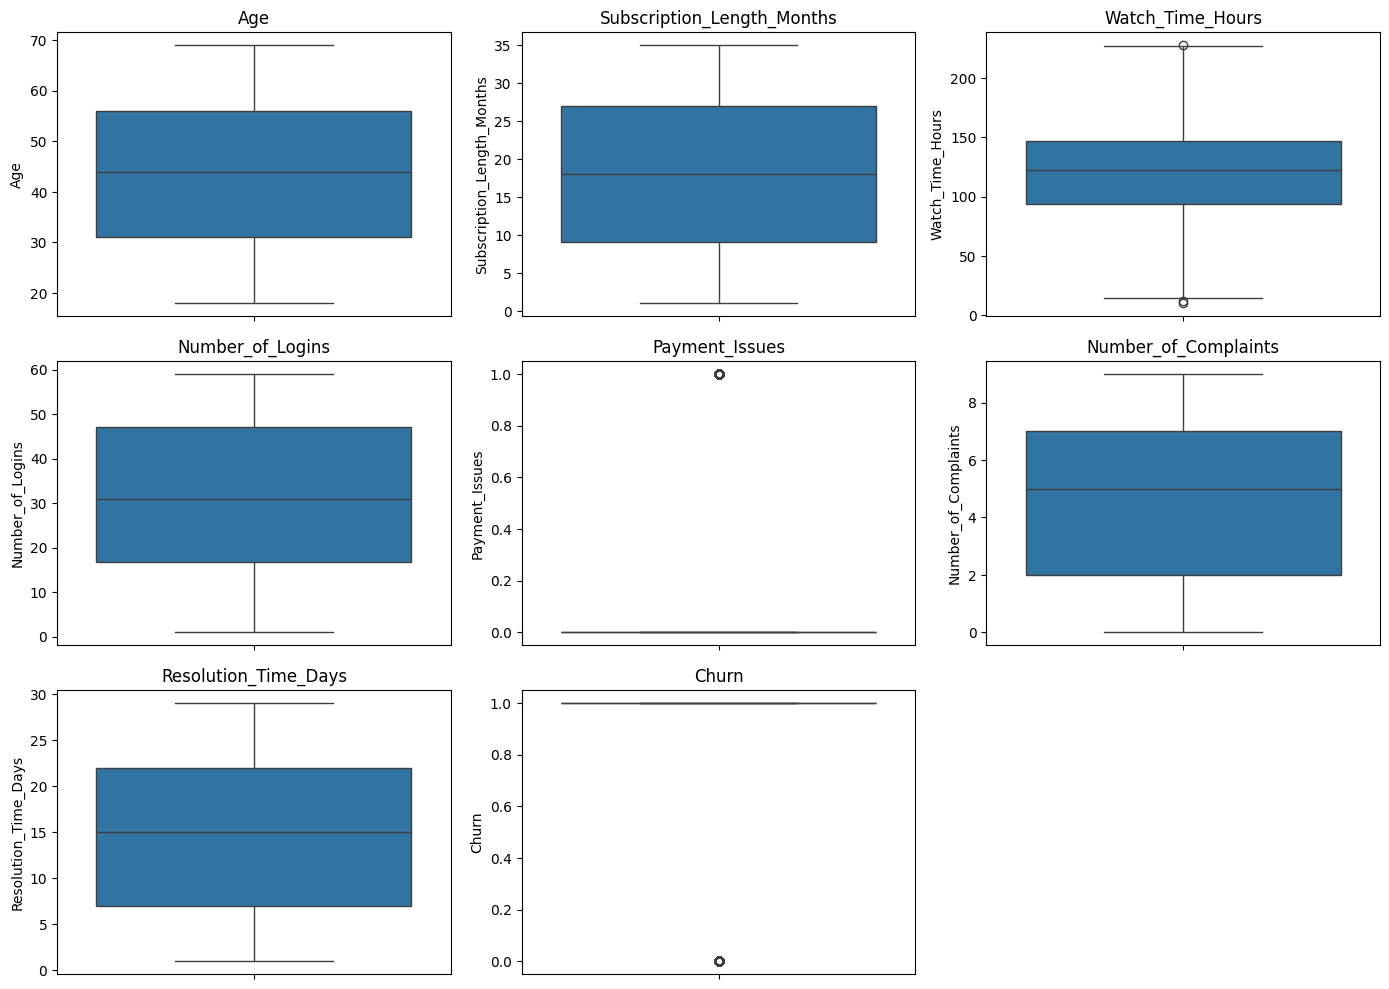

In [92]:
numerical_cols = data.select_dtypes(include='number').columns
# boxplots for numerical features to check for outliers
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()
# The boxplots reveal that watch_time_hours has some outliers. Other numerical features show fewer or no outliers.
# payment issues is skewed to 0, indicating most customers do not have payment issues.  

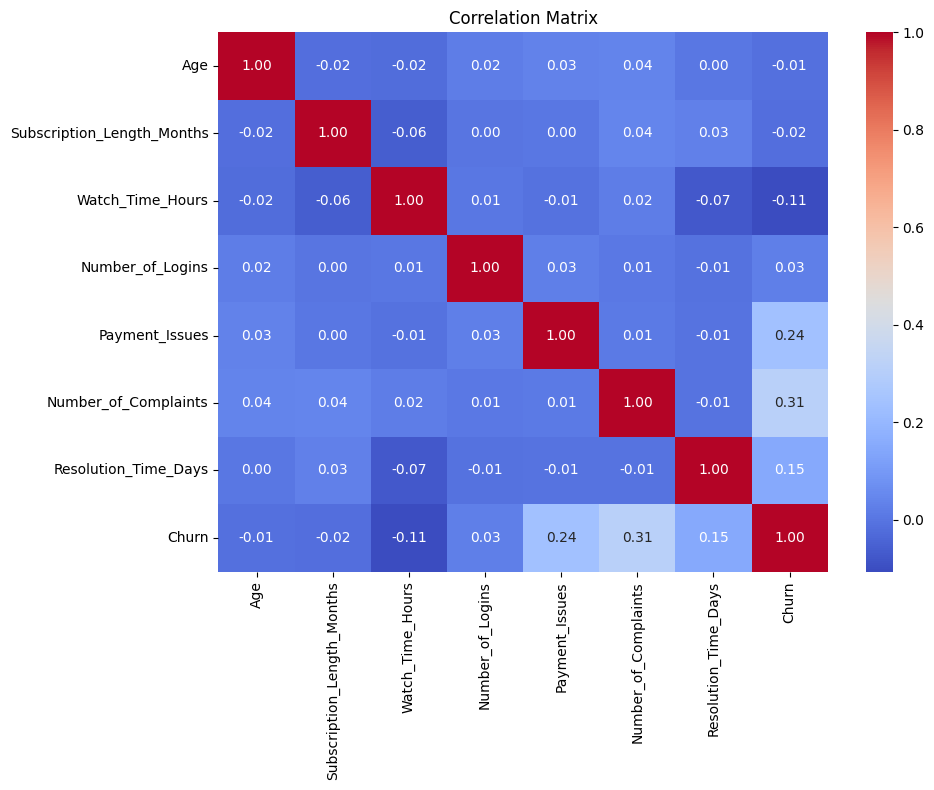

In [93]:
# correlation matrix for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()
# the matrix shows that Number_of_Complaints (0.31), Payment_Issues (0.24), and Resolution_Time_Days (0.15) — are the strongest predictors of churn.
# Watch_Time_Hours shows a slight negative correlation (-0.11), suggesting engaged users are less likely to leave. 

In [94]:
#convert numerical features to categorical
le = LabelEncoder()
data['Membership_Type'] = le.fit_transform(data['Membership_Type'])
data['Payment_Method'] = le.fit_transform(data['Payment_Method'])
data['Preferred_Content_Type'] = le.fit_transform(data['Preferred_Content_Type'])


In [95]:
#split the data into features and target
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

In [96]:
decisionTree = DecisionTreeClassifier(random_state=67)
decisionTree.fit(X_train, y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",67
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [97]:
# using RandomizedSearchCV instead of GridSearchCV because it is more efficient for hyperparameter tuning. when the search space is large it works better with a range of values.
param_grid = {
    'max_depth': list(range(2, 21)) + [None],
    'min_samples_split': list(range(2, 21)),
    'min_samples_leaf': list(range(1, 21)),
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}
random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=67),
    param_grid,
    n_iter=1000,
    cv=5,
    scoring='accuracy',
    random_state=67
)
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

best_dt = random_search.best_estimator_

Best Parameters: {'min_samples_split': 13, 'min_samples_leaf': 8, 'max_features': None, 'max_depth': 4, 'criterion': 'gini'}
Best Score: 0.8425


In [98]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': list(range(2, 21)) + [None],
    'min_samples_split': list(range(2, 21)),
    'min_samples_leaf': list(range(1, 21)),
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=67),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 16}
Best Score: 0.8425


In [ ]:
print("=== RandomizedSearchCV ===")
print("Best Score:", random_search.best_score_)
print("Best Params:", random_search.best_params_)

print("\n=== GridSearchCV ===")
print("Best Score:", grid_search.best_score_)
print("Best Params:", grid_search.best_params_)

In [ ]:
plt.figure(figsize=(20, 12))
plot_tree(
    best_dt,
    feature_names=X.columns,
    class_names=['Not Churned', 'Churned'],
    filled=True,
    rounded=True,
    max_depth=3
)
plt.title('Decision Tree (Top 3 Levels)')
plt.tight_layout()
plt.show()